Set Up

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import matplotlib.pyplot as plt

## Importing Data

Import Excel sheet. The 2021 Excel file contains historical data for the last 11 years.

In [4]:
xl21 = pd.ExcelFile("../raw_data/Fire Facts - Incident response times 2021.xlsx")
sheetnames21 = xl21.sheet_names

Make a DF with the 6.1 figure which contains the Incident Response Times (from emergency call to arrival) from 2010 to 2021

In [125]:
df = xl21.parse('6.1')

Import London GeoJson

In [49]:
geojson = gpd.read_file('../raw_data/london_boroughs.json')

## Cleaning Data

Rearranging and Renaming

In [126]:
df.columns = (df.iloc[2,:]) #promote row with year labels to be column labels
df.drop(index=[0,1,2], inplace=True)  #remove empty rows
df.rename(columns=str, inplace=True)
df.columns = df.columns.str[:-2]
df.rename(columns={'n':'area'}, inplace=True) #rename NaN col label to Area
df.reset_index(drop=True, inplace=True)

Making area names lowercase to be consistent

In [127]:
geojson['name'] = geojson['name'].str.lower()
df['area'] = df['area'].str.lower() #make all area names lowercase to be consistent

In [128]:
df.head()

2,area,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,london total,1900-01-01 00:07:14.205000,1900-01-01 00:07:06.301000,1900-01-01 00:07:02.120000,1900-01-01 00:06:57.896000,1900-01-01 00:07:09.374000,1900-01-01 00:07:15.070000,1900-01-01 00:07:06.652000,1900-01-01 00:06:54.372000,1900-01-01 00:06:52.990000,1900-01-01 00:06:53.169000,1900-01-01 00:06:43.534000,1900-01-01 00:06:48.714000
1,inner london,1900-01-01 00:06:38.541000,1900-01-01 00:06:33.822000,1900-01-01 00:06:29.222000,1900-01-01 00:06:26.809000,1900-01-01 00:06:47.579000,1900-01-01 00:06:52.227000,1900-01-01 00:06:43.427000,1900-01-01 00:06:33.181000,1900-01-01 00:06:30.601000,1900-01-01 00:06:31.108000,1900-01-01 00:06:20.735000,1900-01-01 00:06:27.523000
2,camden,1900-01-01 00:06:26.800000,1900-01-01 00:06:20.553000,1900-01-01 00:06:16.613000,1900-01-01 00:06:07.051000,1900-01-01 00:06:31.514000,1900-01-01 00:06:46.210000,1900-01-01 00:06:40.867000,1900-01-01 00:06:31.719000,1900-01-01 00:06:30.591000,1900-01-01 00:06:32.332000,1900-01-01 00:06:21.974000,1900-01-01 00:06:32.036000
3,city of london,1900-01-01 00:06:27.581000,1900-01-01 00:06:31.662000,1900-01-01 00:06:30.154000,1900-01-01 00:06:17.540000,1900-01-01 00:06:39.363000,1900-01-01 00:06:50.889000,1900-01-01 00:06:40.187000,1900-01-01 00:06:27.462000,1900-01-01 00:06:32.363000,1900-01-01 00:06:28.531000,1900-01-01 00:06:16.579000,1900-01-01 00:06:03.582000
4,hackney,1900-01-01 00:06:46.169000,1900-01-01 00:06:29.648000,1900-01-01 00:06:30.958000,1900-01-01 00:06:24.150000,1900-01-01 00:06:45.608000,1900-01-01 00:06:50.773000,1900-01-01 00:06:39.020000,1900-01-01 00:06:34.390000,1900-01-01 00:06:30.702000,1900-01-01 00:06:33.534000,1900-01-01 00:06:27.608000,1900-01-01 00:06:35.609000


Separating the London/Inner/Outer totals rows

In [129]:
totals_df = df[df['area'].isin(['london total', 'inner london', 'outer london'])] 

In [130]:
totals_df

2,area,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,london total,1900-01-01 00:07:14.205000,1900-01-01 00:07:06.301000,1900-01-01 00:07:02.120000,1900-01-01 00:06:57.896000,1900-01-01 00:07:09.374000,1900-01-01 00:07:15.070000,1900-01-01 00:07:06.652000,1900-01-01 00:06:54.372000,1900-01-01 00:06:52.990000,1900-01-01 00:06:53.169000,1900-01-01 00:06:43.534000,1900-01-01 00:06:48.714000
1,inner london,1900-01-01 00:06:38.541000,1900-01-01 00:06:33.822000,1900-01-01 00:06:29.222000,1900-01-01 00:06:26.809000,1900-01-01 00:06:47.579000,1900-01-01 00:06:52.227000,1900-01-01 00:06:43.427000,1900-01-01 00:06:33.181000,1900-01-01 00:06:30.601000,1900-01-01 00:06:31.108000,1900-01-01 00:06:20.735000,1900-01-01 00:06:27.523000
16,outer london,1900-01-01 00:07:54.852000,1900-01-01 00:07:42.377000,1900-01-01 00:07:38.081000,1900-01-01 00:07:31.772000,1900-01-01 00:07:33.295000,1900-01-01 00:07:39.952000,1900-01-01 00:07:31.223000,1900-01-01 00:07:16.661000,1900-01-01 00:07:16.471000,1900-01-01 00:07:16.718000,1900-01-01 00:07:06.954000,1900-01-01 00:07:11.194000


Removing the London/Inner/Outer totals rows

In [131]:
df.drop(df.index[df['area'].isin(['london total', 'inner london', 'outer london'])], inplace=True) #remove total rows
df.reset_index(drop=True, inplace=True)
df.set_index('area', drop=True, inplace=True)

In [132]:
df.head()

2,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
area,,,,,,,,,,,,
camden,1900-01-01 00:06:26.800000,1900-01-01 00:06:20.553000,1900-01-01 00:06:16.613000,1900-01-01 00:06:07.051000,1900-01-01 00:06:31.514000,1900-01-01 00:06:46.210000,1900-01-01 00:06:40.867000,1900-01-01 00:06:31.719000,1900-01-01 00:06:30.591000,1900-01-01 00:06:32.332000,1900-01-01 00:06:21.974000,1900-01-01 00:06:32.036000
city of london,1900-01-01 00:06:27.581000,1900-01-01 00:06:31.662000,1900-01-01 00:06:30.154000,1900-01-01 00:06:17.540000,1900-01-01 00:06:39.363000,1900-01-01 00:06:50.889000,1900-01-01 00:06:40.187000,1900-01-01 00:06:27.462000,1900-01-01 00:06:32.363000,1900-01-01 00:06:28.531000,1900-01-01 00:06:16.579000,1900-01-01 00:06:03.582000
hackney,1900-01-01 00:06:46.169000,1900-01-01 00:06:29.648000,1900-01-01 00:06:30.958000,1900-01-01 00:06:24.150000,1900-01-01 00:06:45.608000,1900-01-01 00:06:50.773000,1900-01-01 00:06:39.020000,1900-01-01 00:06:34.390000,1900-01-01 00:06:30.702000,1900-01-01 00:06:33.534000,1900-01-01 00:06:27.608000,1900-01-01 00:06:35.609000
hammersmith and fulham,1900-01-01 00:07:00.143000,1900-01-01 00:06:52.843000,1900-01-01 00:06:42.646000,1900-01-01 00:06:26.249000,1900-01-01 00:06:37.866000,1900-01-01 00:06:39.678000,1900-01-01 00:06:43.434000,1900-01-01 00:06:26.067000,1900-01-01 00:06:25.676000,1900-01-01 00:06:29.536000,1900-01-01 00:06:20.153000,1900-01-01 00:06:23.307000
haringey,1900-01-01 00:07:33.370000,1900-01-01 00:07:26.860000,1900-01-01 00:07:17.172000,1900-01-01 00:07:13.717000,1900-01-01 00:07:15.546000,1900-01-01 00:07:17.588000,1900-01-01 00:06:37.885000,1900-01-01 00:07:05.180000,1900-01-01 00:06:55.524000,1900-01-01 00:07:08.145000,1900-01-01 00:06:50.129000,1900-01-01 00:06:57.614000


Changing Datetime to Float

In [133]:
def timetosecs(time):
    return round(time.hour + time.minute*60 + time.second + time.microsecond/1000000)

In [134]:
df = df.applymap(timetosecs)

In [135]:
df.head()

2,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
area,,,,,,,,,,,,
camden,387,381,377,367,392,406,401,392,391,392,382,392
city of london,388,392,390,378,399,411,400,387,392,389,377,364
hackney,406,390,391,384,406,411,399,394,391,394,388,396
hammersmith and fulham,420,413,403,386,398,400,403,386,386,390,380,383
haringey,453,447,437,434,436,438,398,425,416,428,410,418


Adding a mean columns

In [136]:
df['mean'] = df.mean(axis=1).round(2)

In [137]:
df.head()

2,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,mean
area,,,,,,,,,,,,,
camden,387,381,377,367,392,406,401,392,391,392,382,392,388.33
city of london,388,392,390,378,399,411,400,387,392,389,377,364,388.92
hackney,406,390,391,384,406,411,399,394,391,394,388,396,395.83
hammersmith and fulham,420,413,403,386,398,400,403,386,386,390,380,383,395.67
haringey,453,447,437,434,436,438,398,425,416,428,410,418,428.33


## Making relvant DFs

Separating Inner and Outer London

In [138]:
inner_df = df[0:14]
outer_df = df[14:]

GeoDataframes for Geoplots

In [249]:
geo_df =  df.merge(geojson, right_on='name',left_on='area')
geo_df = gpd.GeoDataFrame(geo_df, geometry='geometry')
geo_df['coords'] = geo_df.geometry.apply(lambda x: x.representative_point().coords[:][0])

In [250]:
inner_geo_df = geo_df[0:14]
outer_geo_df = geo_df[14:]

## Plots

### Has the response time improved over 10 years?

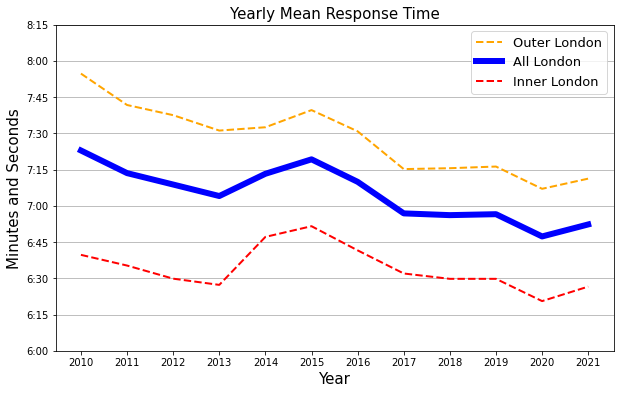

In [172]:
#Yearly Mean
fig, ax = plt.subplots(1, figsize=(10, 6))

ax.plot(outer_df.columns[:-1], outer_df.mean()[:-1], linewidth=2, linestyle='dashed', color='orange')
ax.plot(df.columns[:-1], df.mean()[:-1], linewidth=6, color='blue')
ax.plot(inner_df.columns[:-1], inner_df.mean()[:-1], color='red', linewidth=2, linestyle='dashed')

ax.set_ylim(ymin=360, ymax = 480)
ax.set_yticks([6*60,6.25*60,6.5*60,6.75*60,7*60,7.25*60,7.5*60,7.75*60,8*60,8.25*60])
ax.set_yticklabels(['6:00','6:15','6:30','6:45','7:00','7:15','7:30','7:45','8:00','8:15'])
ax.grid(axis='y')
ax.set_title('Yearly Mean Response Time', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Minutes and Seconds', fontsize=15)
ax.legend(['Outer London','All London','Inner London'], prop={'size': 13})

It seems to have generally improved over 10 years. Inner London has consistently shorter response times than Outer London

### How has it improved over 10 years by borough?

Text(0.5, 1.0, '10-year Improvement in Response Times for each Inner London Borough')

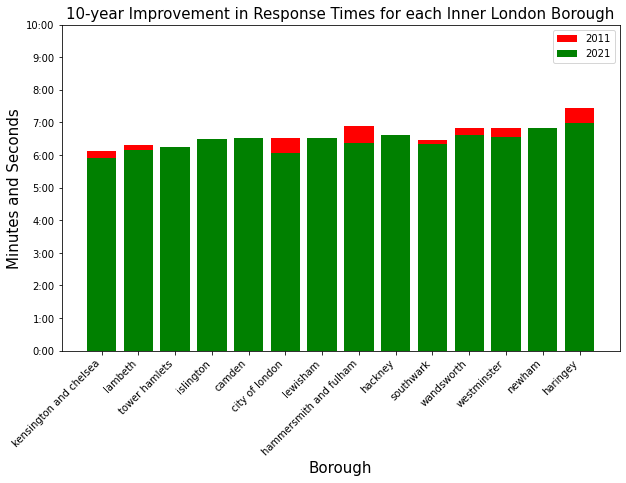

In [234]:
fig, ax = plt.subplots(1, figsize=(10, 6))

plt.bar(x=inner_df.sort_values(by='mean').index,height=inner_df.sort_values(by='mean')['2011'], color='red')
plt.bar(x=inner_df.sort_values(by='mean').index,height=inner_df.sort_values(by='mean')['2021'], color='green')
plt.xticks(rotation=45, ha='right');
plt.yticks([0,1*60,2*60,3*60,4*60,5*60,6*60,7*60,8*60,9*60,10*60],
           ['0:00','1:00','2:00','3:00','4:00','5:00','6:00','7:00','8:00','9:00','10:00']);
plt.legend(['2011','2021'])
plt.ylabel('Minutes and Seconds', fontsize=15)
plt.xlabel('Borough', fontsize=15)
plt.title('10-year Improvement in Response Times for each Inner London Borough', fontsize=15)

Text(0.5, 1.0, '10-year Improvement in Response Times for each Outer London Borough')

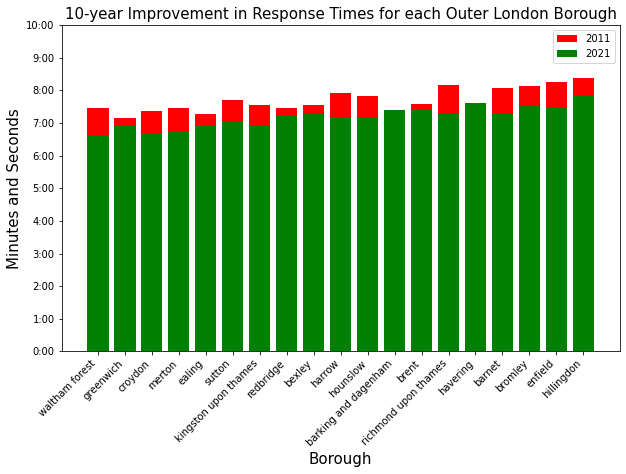

In [232]:
fig, ax = plt.subplots(1, figsize=(10, 6))

plt.bar(x=outer_df.sort_values(by='mean').index,height=outer_df.sort_values(by='mean')['2011'], color='red')
plt.bar(x=outer_df.sort_values(by='mean').index,height=outer_df.sort_values(by='mean')['2021'], color='green')
plt.xticks(rotation=45, ha='right');
plt.yticks([0,1*60,2*60,3*60,4*60,5*60,6*60,7*60,8*60,9*60,10*60],
           ['0:00','1:00','2:00','3:00','4:00','5:00','6:00','7:00','8:00','9:00','10:00']);
plt.legend(['2011','2021'])
plt.ylabel('Minutes and Seconds', fontsize=15)
plt.xlabel('Borough', fontsize=15)
plt.title('10-year Improvement in Response Times for each Outer London Borough', fontsize=15)

### How has it Improved over 1 year by borough?

Text(0.5, 1.0, '1-year Improvement in Response Times for each Outer London Borough')

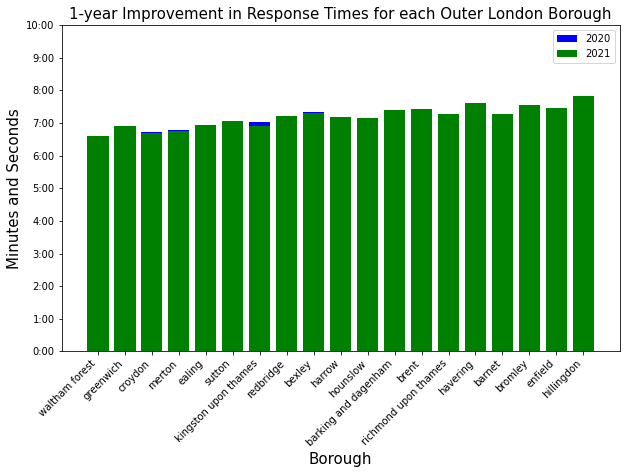

In [235]:
fig, ax = plt.subplots(1, figsize=(10, 6))

plt.bar(x=outer_df.sort_values(by='mean').index,height=outer_df.sort_values(by='mean')['2020'], color='blue')
plt.bar(x=outer_df.sort_values(by='mean').index,height=outer_df.sort_values(by='mean')['2021'], color='green')
plt.xticks(rotation=45, ha='right');
plt.yticks([0,1*60,2*60,3*60,4*60,5*60,6*60,7*60,8*60,9*60,10*60],
           ['0:00','1:00','2:00','3:00','4:00','5:00','6:00','7:00','8:00','9:00','10:00']);
plt.legend(['2020','2021'])
plt.ylabel('Minutes and Seconds', fontsize=15)
plt.xlabel('Borough', fontsize=15)
plt.title('1-year Improvement in Response Times for each Outer London Borough', fontsize=15)

Text(0.5, 1.0, '1-year Improvement in Response Times for each Inner London Borough')

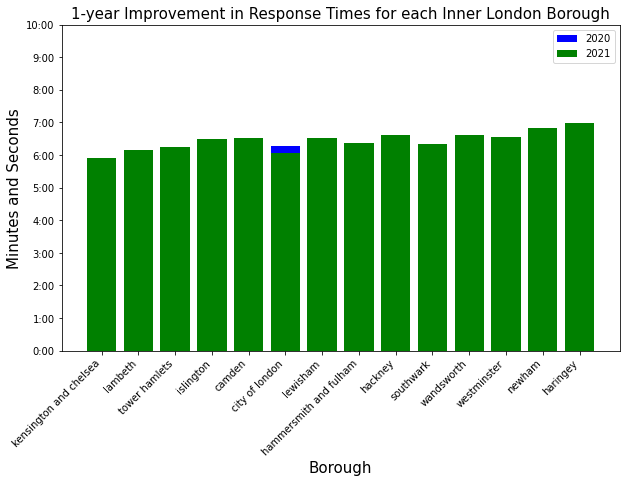

In [240]:
fig, ax = plt.subplots(1, figsize=(10, 6))

plt.bar(x=inner_df.sort_values(by='mean').index,height=inner_df.sort_values(by='mean')['2020'], color='blue')
plt.bar(x=inner_df.sort_values(by='mean').index,height=inner_df.sort_values(by='mean')['2021'], color='green')
plt.xticks(rotation=45, ha='right');
plt.yticks([0,1*60,2*60,3*60,4*60,5*60,6*60,7*60,8*60,9*60,10*60],
           ['0:00','1:00','2:00','3:00','4:00','5:00','6:00','7:00','8:00','9:00','10:00']);
plt.legend(['2020','2021'])
plt.ylabel('Minutes and Seconds', fontsize=15)
plt.xlabel('Borough', fontsize=15)
plt.title('1-year Improvement in Response Times for each Inner London Borough', fontsize=15)

### GeoPlot

<AxesSubplot:>

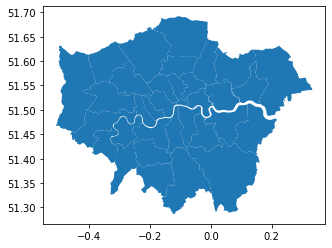

In [246]:
geo_df.plot()

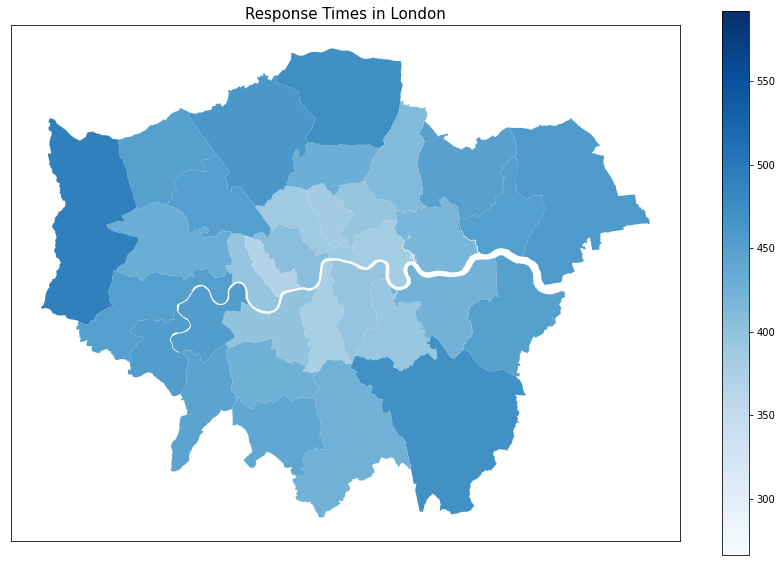

In [291]:
f, ax = plt.subplots(1, figsize=(15, 10))
ax = geo_df.plot(column='mean', cmap='Blues' ,ax=ax,  
         legend=True, markersize=10, vmin=minmean-100, vmax=maxmean+100)
# for idx, row in geo_df.iterrows():
#     plt.annotate(text=row['mean'], xy=row['coords'],
#                  horizontalalignment='center', color='black', fontsize=10)
plt.title('Response Times in London', fontsize=15)
plt.yticks([])
plt.xticks([])
plt.show()


In [257]:
minmean,maxmean = geo_df['mean'].min(), geo_df['mean'].max()

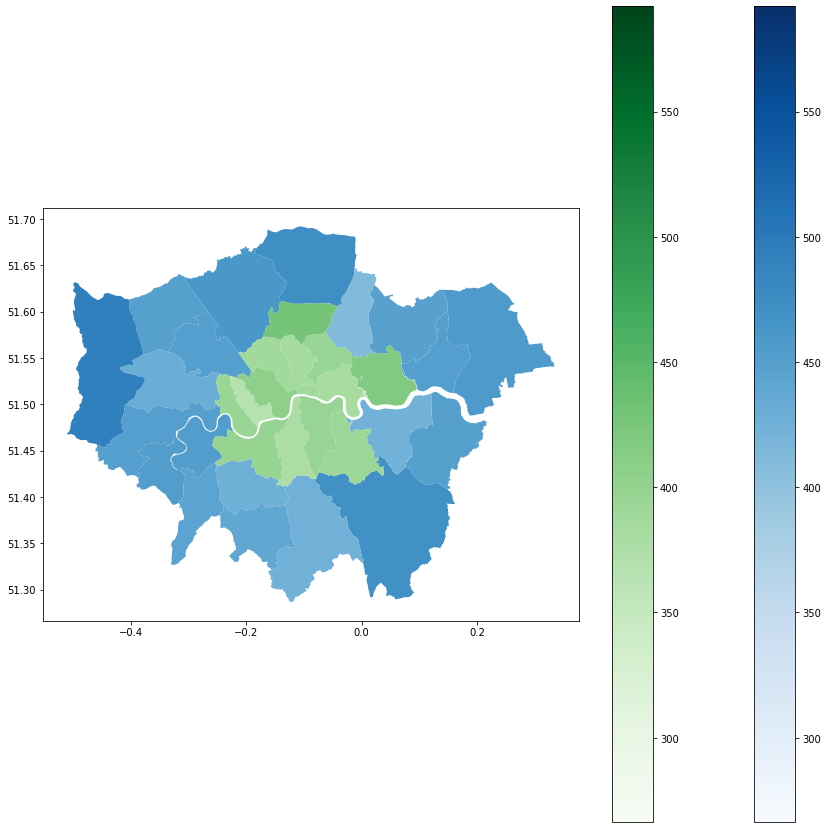

In [293]:
f, ax = plt.subplots(1, figsize=(15, 15))
ax = outer_geo_df.plot(column='mean', cmap='Blues' ,ax=ax, vmin=minmean-100, vmax=maxmean+100,
         legend=True)
ax = inner_geo_df.plot(column='mean', cmap='Greens' ,ax=ax, vmin=minmean-100, vmax=maxmean+100,
         legend=True)
plt.show()